<a href="https://colab.research.google.com/github/Ankit2759/ImageProcessing/blob/main/histogram11sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Histogram and Image Enhancement

import libraries

In [ ]:
import cv2          # OpenCV for image processing
import numpy as np  # Numerical library for array operations
import matplotlib.pyplot as plt  # For displaying images and histograms

Read and Display image

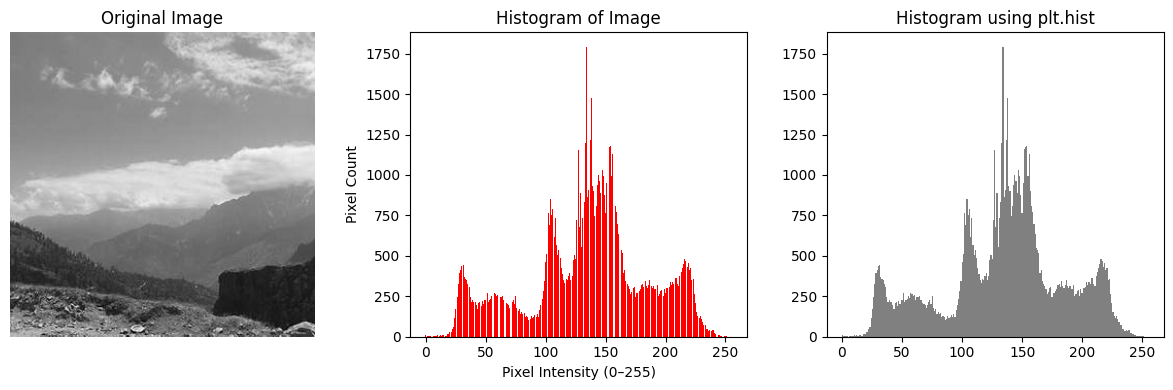

In [ ]:
# Read the image in grayscale mode (single channel)
A = cv2.imread('/content/original_Image.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if A is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    # Create a figure window
    plt.figure(figsize=(12,4))

    # Display Original Image
    plt.subplot(1,3,1)
    plt.imshow(A, cmap='gray')    # Show image in grayscale colormap
    plt.title('Original Image')
    plt.axis('off')               # Hide axis for clarity

    # Calculate Manually Histogram
    r, c = A.shape                      # Get image dimensions (rows, columns)
    H = np.zeros(256, dtype=int)        # Initialize histogram array with 256 bins (0–255
    for i in range(r):
        for j in range(c):
            p = A[i, j]        # Get pixel intensity
            H[p] += 1          # Increment count for that intensity
    # Plot Manual histogram
    plt.subplot(1,3,2)
    plt.bar(range(256), H, color='red')
    plt.title('Histogram of Image')
    plt.xlabel('Pixel Intensity (0–255)')
    plt.ylabel('Pixel Count')

    # Plot histogram using built-in matplotlib function
    plt.subplot(1,3,3)
    plt.hist(A.ravel(), bins=256, range=(0,255), color='gray')
    plt.title('Histogram using plt.hist')
    plt.tight_layout()
    plt.show()

Contrast and Brightness

Enter the brightness: 100
Enter the contrast: 0.8


/tmp/ipython-input-2239024732.py:38: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(grayimg.ravel(), 256, [0,255])
/tmp/ipython-input-2239024732.py:42: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(Bright.ravel(), 256, [0,255])
/tmp/ipython-input-2239024732.py:46: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(Contr.ravel(), 256, [0,255])


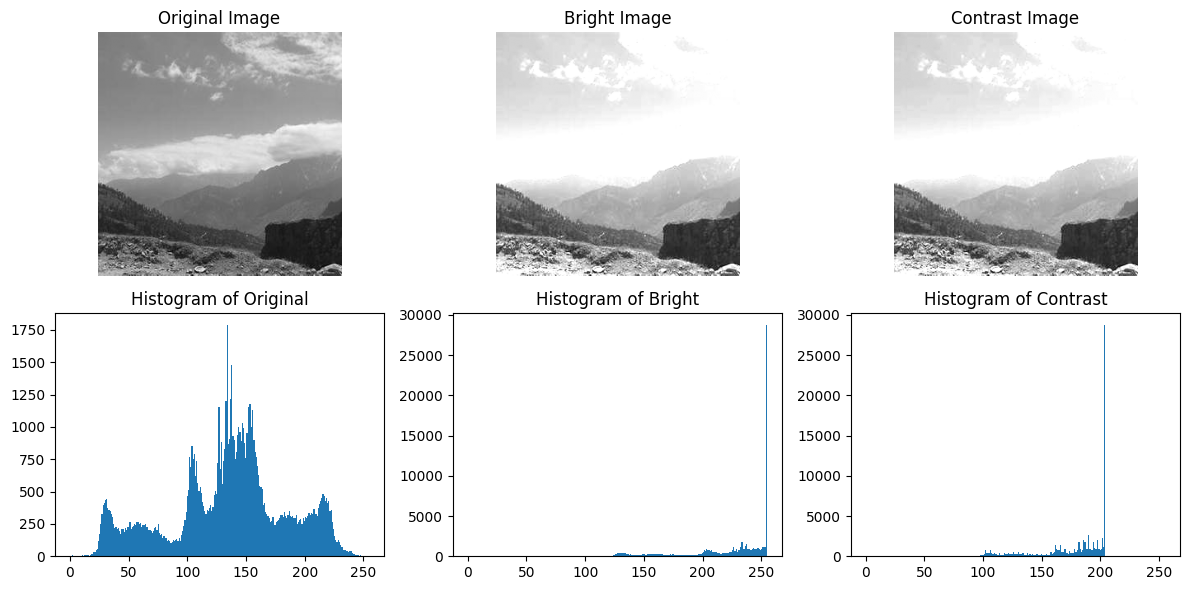

In [ ]:
# Read the original image in color
I = cv2.imread('/content/original_Image.jpeg')
# Convert it to grayscale for processing
grayimg = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Get user input for brightness and contrast
B = int(input('Enter the brightness: '))   # Brightness offset
C = float(input('Enter the contrast: '))   # Contrast scaling factor

# Apply brightness adjustment
Bright = cv2.add(grayimg, B)
# Apply contrast adjustment
Contr = cv2.convertScaleAbs(Bright, alpha=C, beta=0)

# Display images and their histograms
plt.figure(figsize=(12,6))

# Original image
plt.subplot(2,3,1)
plt.imshow(grayimg, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Brightened image
plt.subplot(2,3,2)
plt.imshow(Bright, cmap='gray')
plt.title('Bright Image')
plt.axis('off')

# Contrast adjusted image
plt.subplot(2,3,3)
plt.imshow(Contr, cmap='gray')
plt.title('Contrast Image')
plt.axis('off')

# Histograms for each image
plt.subplot(2,3,4)
plt.hist(grayimg.ravel(), 256, [0,255])
plt.title('Histogram of Original')

plt.subplot(2,3,5)
plt.hist(Bright.ravel(), 256, [0,255])
plt.title('Histogram of Bright')

plt.subplot(2,3,6)
plt.hist(Contr.ravel(), 256, [0,255])
plt.title('Histogram of Contrast')

plt.tight_layout()
plt.show()

PDF and CDF CALCULATION

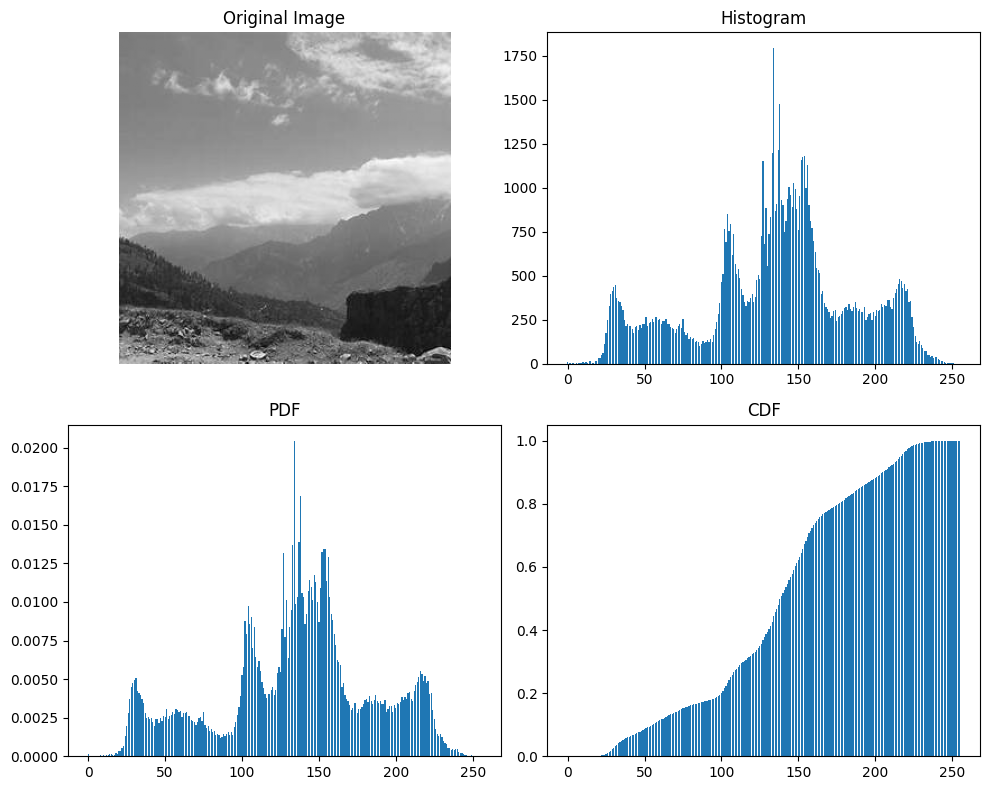

In [ ]:
# Read the grayscale image
I = cv2.imread('/content/original_Image.jpeg', cv2.IMREAD_GRAYSCALE)

# Compute histogram using OpenCV
hist = cv2.calcHist([I], [0], None, [256], [0,256]).ravel()

# Compute PDF (Probability Density Function)
pdf = hist / np.sum(hist)

# Compute CDF (Cumulative Distribution Function)
cdf = np.cumsum(pdf)

# Display image, histogram, PDF, and CDF
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2,2,2)
plt.bar(range(256), hist)
plt.title('Histogram')

plt.subplot(2,2,3)
plt.bar(range(256), pdf)
plt.title('PDF')

plt.subplot(2,2,4)
plt.bar(range(256), cdf)
plt.title('CDF')

plt.tight_layout()
plt.show()


Histogram Equalization using CDF

/tmp/ipython-input-2012076274.py:17: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(trans.ravel(), 256, [0,255])


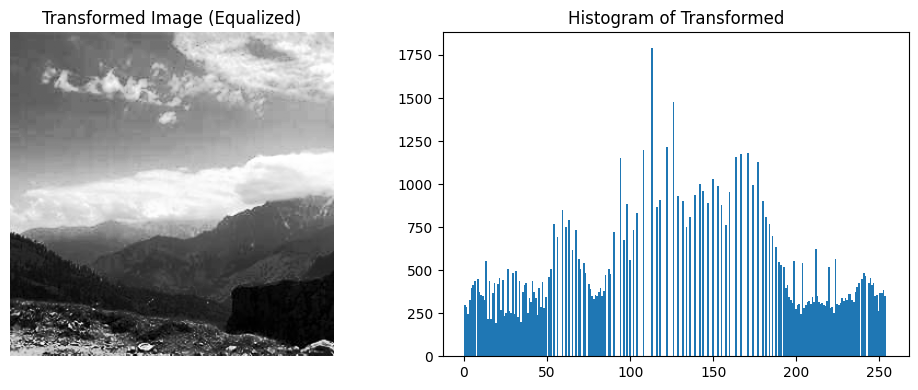

In [ ]:
 # Create an empty array for the transformed image
trans = np.zeros_like(I, dtype=np.uint8)

# Perform transformation using the CDF
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        trans[i, j] = np.uint8(cdf[I[i, j]] * 255)

# Display equalized image and its histogram
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(trans, cmap='gray')
plt.title('Transformed Image (Equalized)')
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(trans.ravel(), 256, [0,255])
plt.title('Histogram of Transformed')

plt.tight_layout()
plt.show()

Negative Image

/tmp/ipython-input-1377315030.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(I.ravel(), 256, [0,255])
/tmp/ipython-input-1377315030.py:17: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(W.ravel(), 256, [0,255])


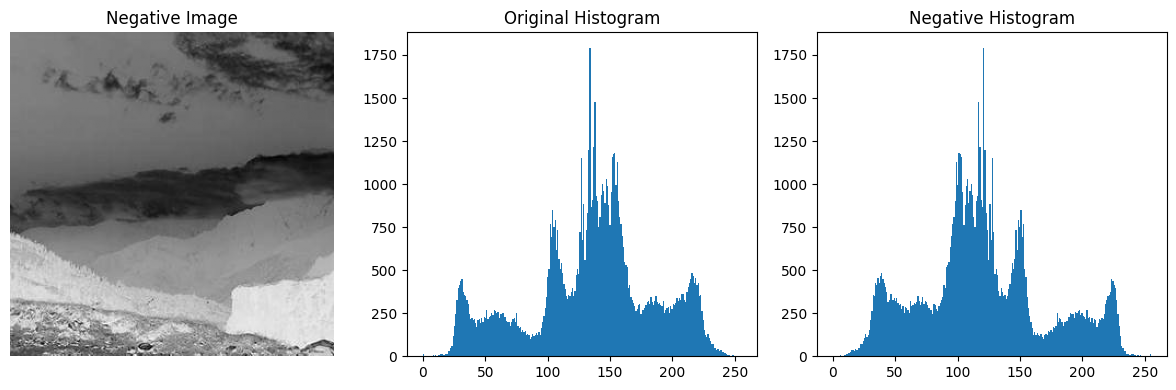

In [ ]:

# Create a negative of the image
W = 255 - I

# Display negative image and histograms
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(W, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.hist(I.ravel(), 256, [0,255])
plt.title('Original Histogram')

plt.subplot(1,3,3)
plt.hist(W.ravel(), 256, [0,255])
plt.title('Negative Histogram')

plt.tight_layout()
plt.show()


Log Transform

/tmp/ipython-input-1109551112.py:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(logTrans.ravel(), 256, [0,255])


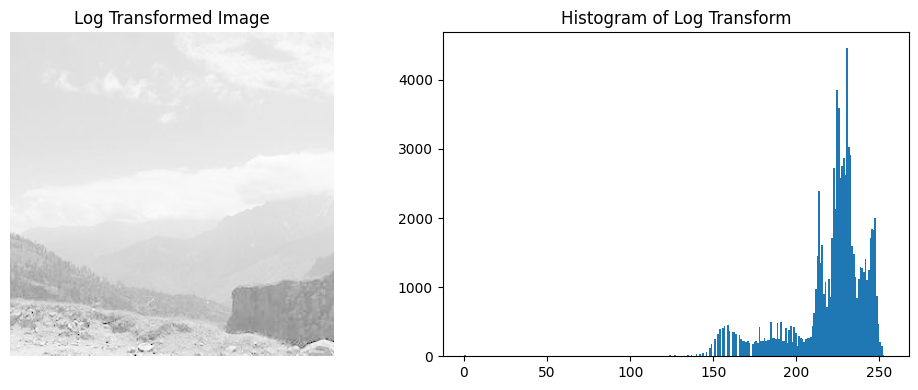

In [ ]:

# Constant scaling factor for log transform
c = 1

# Apply logarithmic transformation
logTrans = c * np.log1p(np.array(I, dtype='float'))   # log(1 + pixel)
# Normalize to 0–255 range and convert to uint8
logTrans = np.uint8(logTrans / np.max(logTrans) * 255)

# Display log transformed image and its histogram
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(logTrans, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(logTrans.ravel(), 256, [0,255])
plt.title('Histogram of Log Transform')

plt.tight_layout()
plt.show()
